In [21]:
using DataFrames, CSV, Statistics, Optim, Plots #UnPack
using Distributions, NearestNeighbors, StatsBase
using LaTeXStrings, Clustering, Distances
using SkyCoords

In [2]:
#df = DataFrame(CSV.File("./data/pleiades_10.csv"))
df = DataFrame(CSV.File("./data/pleiades_field.csv"))

# alpha, delta, rango = 19.997, -45.548, 10
# conditions = (alpha-rango .< df.pmra .< alpha+rango) .& (delta-rango .< df.pmdec .< delta+rango) .& 
#             (4 .< df.parallax .< 10)
# df = df[conditions, :]

df.parallax = df.parallax * 1000
df.parallax_error = df.parallax_error * 1000
#filter(:x => x -> !any(f -> f(x), (ismissing, isnothing, isnan)), df)
#first(df, 5)
nrow(df)

1965

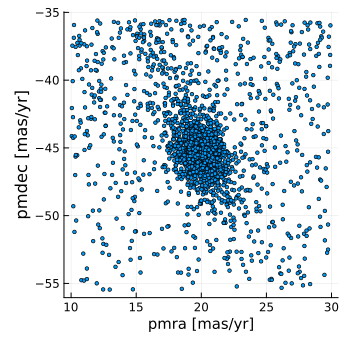

In [3]:
plot(df.pmra, df.pmdec,seriestype=:scatter, ms=2, legend=false, size=(350,350))
#scatter!(df.pmra, df.pmdec, ms=2, legend=false, mc=:blue)
xlabel!("pmra [mas/yr]", xguidefontsize=10)
ylabel!("pmdec [mas/yr]", xguidefontsize=10)

In [4]:
function log_likelihood(X::Vector, params::Vector)
    # @unpack nc, s1, s2, mu1, mu2 = params
    nc, s1, s2, mu1, mu2 = params[1], params[2], params[3], params[4], params[5]
    Ac = -0.5 * ((X .- mu1)./s1).^2
    Be = -0.5 * ((X .- mu2)./s2).^2
    y = nc./(sqrt(2 * pi) .* s1) .* exp.(Ac) + (1-nc)./(sqrt(2 * pi) .* s2) .* exp.(Be)
    return sum(log.(y))
end

methods(log_likelihood)
make_closures(X) = params -> -log_likelihood(X, params)

make_closures (generic function with 1 method)

In [5]:
nc, s1, s2 = 0.5, std(df.parallax)/2, std(df.parallax)
mu1, mu2 = mean(df.parallax), mean(df.parallax)
initparams_parallax = Vector{Float64}([nc, s1, s2, mu1, mu2])
#println(log_likelihood(sample_data, initparams_parallax))
nll = make_closures(df.parallax)
opt_parallax = optimize(nll, initparams_parallax, NelderMead(), autodiff=:forward)
println(nll(initparams_parallax))

nc, s1, s2 = 0.5, std(df.ra)/2, std(df.ra)
mu1, mu2 = mean(df.ra), mean(df.ra)
initparams_ra = Vector{Float64}([nc, s1, s2, mu1, mu2])
nll = make_closures(df.ra)
opt_ra = optimize(nll, initparams_ra, NelderMead(), autodiff=:forward)
println(nll(initparams_ra))

nc, s1, s2 = 0.5, std(df.dec)/2, std(df.dec)
mu1, mu2 = mean(df.dec), mean(df.dec)
initparams_dec = Vector{Float64}([nc, s1, s2, mu1, mu2])
nll = make_closures(df.dec)
opt_dec = optimize(nll, initparams_dec, NelderMead(), autodiff=:forward)
println(nll(initparams_dec))

nc, s1, s2 = 0.5, std(df.pmra)/2, std(df.pmra)
mu1, mu2 = mean(df.pmra), mean(df.pmra)
initparams_pmra = Vector{Float64}([nc, s1, s2, mu1, mu2])
nll = make_closures(df.pmra)
opt_pmra = optimize(nll, initparams_pmra, NelderMead(), autodiff=:forward)
println(nll(initparams_pmra))

nc, s1, s2 = 0.5, std(df.pmdec)/2, std(df.pmdec)
mu1, mu2 = mean(df.pmdec), mean(df.pmdec)
initparams_pmdec = Vector{Float64}([nc, s1, s2, mu1, mu2])
nll = make_closures(df.pmdec)
opt_pmdec = optimize(nll, initparams_pmdec, NelderMead(), autodiff=:forward)
println(nll(initparams_pmdec))

3103.421763351864
5259.675760884437
5088.072311582243
5231.467297555881
5478.40787366097


In [6]:
param_parallax = Optim.minimizer(opt_parallax)
param_ra = Optim.minimizer(opt_ra)
param_dec = Optim.minimizer(opt_dec)
param_pmra = Optim.minimizer(opt_pmra)
param_pmdec = Optim.minimizer(opt_pmdec)

for (before, after) in zip(initparams_pmra, param_pmra)
    @show before, after
end

(before, after) = (0.5, 0.4882827762732183)
(before, after) = (1.8196697804348285, 1.0381583240354222)
(before, after) = (3.639339560869657, 4.983492048616124)
(before, after) = (19.880819740998746, 19.938363463690635)
(before, after) = (19.880819740998746, 19.82591091010572)


In [7]:
function gaussian_function(X::Vector, params::Vector)
    x_values = collect(range(minimum(X), maximum(X), length=length(X)))
    nc, s1, s2, mu1, mu2 = params[1], params[2], params[3], params[4], params[5]
    Ac = -0.5*((x_values .- mu1)./s1).^2
    Be = -0.5*((x_values .- mu2)./s2).^2
    return nc./(sqrt(2 * pi) .* s1) .* exp.(Ac) + (1-nc)./(sqrt(2 * pi) .* s2) .* exp.(Be)
end

gaussian_function (generic function with 1 method)

In [ ]:
#x = LinRange(minimum(df.parallax), maximum(df.parallax), 100)
#x = collect(range(minimum(df.parallax), maximum(df.parallax), length=100))
#y = gaussian_function(df.parallax, param_parallax)

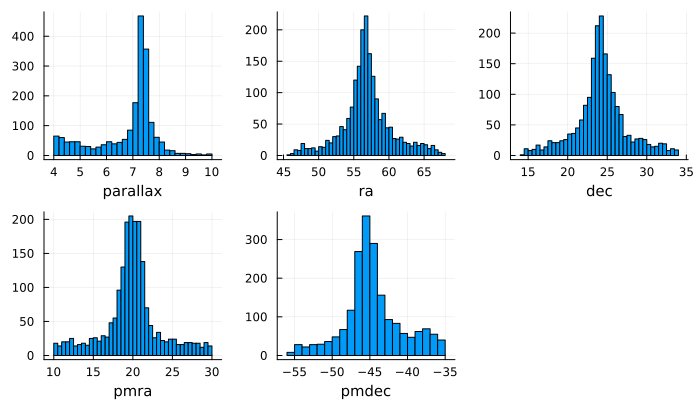

In [8]:
#y1 = plot(gaussian_function(df.parallax, param_parallax),legend=false)
p1 = histogram(df.parallax, xlabel="parallax", xguidefontsize=10)
p2 = histogram(df.ra, xlabel="ra", xguidefontsize=10)
p3 = histogram(df.dec, xlabel="dec", xguidefontsize=10)
p4 = histogram(df.pmra, xlabel="pmra", xguidefontsize=10)
p5 = histogram(df.pmdec, xlabel="pmdec", xguidefontsize=10)

plot(p1, p2, p3, p4, p5, layout=(2, 3), legend=false)
plot!(size=(700,400))

In [9]:
#nc, s1, s2, mu1, mu2
popt = reduce(hcat, (param_parallax, param_ra, param_dec, param_pmra, param_pmdec))
names = ("parallax","ra","dec","pmra","pmdec")

for (index, value) in enumerate(names)
    println(popt[:,index],' ',"$value")
end

[0.5165085598030097, 0.1874469538794452, 1.4252722097613522, 7.365868779705064, 6.234351902380681] parallax
[0.40480806898853755, 1.0400494706774346, 4.595864975366315, 56.56499520225973, 57.07915687976609] ra
[0.40914377839037563, 1.010103974566422, 4.221769152429004, 24.160320293039202, 24.251871218080215] dec
[0.4882827762732183, 1.0381583240354222, 4.983492048616124, 19.938363463690635, 19.82591091010572] pmra
[0.37603994460552076, 1.072473504542602, 4.837279135946296, -45.45735189594586, -44.128959733377876] pmdec


In [10]:
function pdf_sampling(X::Number, params::Vector)
    nc, s1, s2, mu1, mu2 = params[1], params[2], params[3], params[4], params[5]
    Ac = -0.5*((X - mu1)/s1)^2
    Be = -0.5*((X - mu2)/s2)^2
    return nc/(sqrt(2 * pi) * s1) * exp(Ac) + (1-nc)/(sqrt(2 * pi) * s2) * exp(Be)
end

function Metropolis(N::Number, data::Vector, params::Vector)
    
    nc, s1, s2, mu1, mu2 = params[1], params[2], params[3], params[4], params[5]
    states = []
    current = rand(Uniform(minimum(data), maximum(data)), 1)[1]
    
    for i in 1:N
        
        push!(states, current)
        movement = rand(Uniform(minimum(data), maximum(data)), 1)[1]
        
        current_prob = pdf_sampling(current, params)
        movement_prob = pdf_sampling(movement, params)
        
        alpha = min(movement_prob / current_prob, 1.0)
        g = rand()
        
        if alpha > g
            current = movement
        end
    end
            
    return states
end

Metropolis (generic function with 1 method)

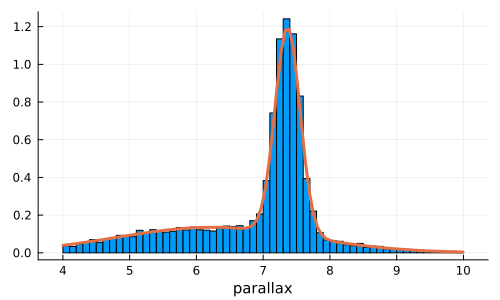

In [61]:
sampling = Metropolis(20000, df.parallax, param_parallax)
x_values = Vector{Float64}(range(minimum(df.parallax), maximum(df.parallax), 100))

histogram(sampling, xlabel="parallax", xguidefontsize=10, normalize=:pdf)
plot!(x_values, gaussian_function(x_values, param_parallax), legend=false, lw=3, size=(500,300))

In [53]:
data = reduce(hcat, (df.parallax, df.ra, df.dec, df.pmra, df.pmdec))
parameters = reduce(hcat, (param_parallax, param_ra, param_dec, param_pmra, param_pmdec))

simulated_eps = []

for eps in 1:1000
    
    simulated_data = ones(Float64, size(data))

    for i in 1:5
        n_iter = size(data)[1]
        data_test = Vector{Float64}(data[:,i])
        values = Vector{Float64}(parameters[:,i])
        sampling = Metropolis(n_iter, data_test, values)
        simulated_data[:,i] = sampling
    end

    dt = fit(ZScoreTransform, simulated_data, dims=2)
    standardized_data = transpose(StatsBase.transform(dt, simulated_data));

    k = 7
    kdtree = KDTree(standardized_data)
    #balltree = BallTree(standardized_data)
    index, distances = knn(kdtree, standardized_data, k, true);

    median_values = []
    for j in 1:size(data)[1]
        push!(median_values, median(distances[j]))
    end

    # stephist(median_values, xguidefontsize=10, normalize=:pdf, size=(350,350), legend=false, color=:gray)
    # xlabel!(L"7_{th}-NND")
    # vline!([median(median_values)], lw=2)
    # xlims!((0.0,0.1))
    
    push!(simulated_eps, median(median(median_values)))
    
end

In [13]:
dt = fit(ZScoreTransform, data, dims=2)
standardized_data = transpose(StatsBase.transform(dt, data));

# Define the parameters for DBSCAN
ϵ = median(simulated_eps)
minpts = 8

# Compute the pairwise distance matrix
dist = pairwise(Euclidean(), standardized_data, standardized_data)

# Perform DBSCAN clustering
clustering = dbscan(dist, ϵ, minpts);

In [14]:
clustering.counts

3-element Vector{Int64}:
 1059
   12
   13

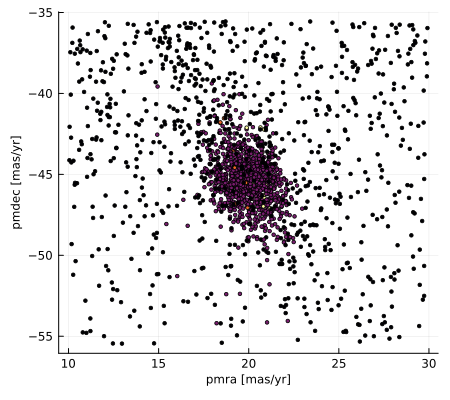

In [55]:
scatter(df.pmra, df.pmdec, ms=2, legend=false, marker_z=clustering.assignments, size=(450,400))
xlabel!("pmra [mas/yr]", xguidefontsize=8)
ylabel!("pmdec [mas/yr]", yguidefontsize=8)

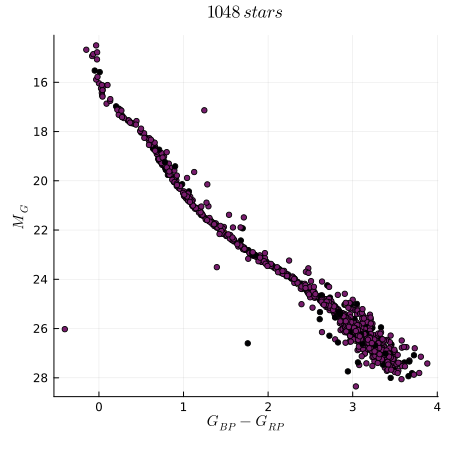

In [56]:
g_mag = df.g .+ 5 .- 5 .*log10.(1 ./ df.parallax)
color = df.bp .- df.rp
cond = clustering.assignments .== 1

scatter(color[cond], g_mag[cond], ms=3, legend=false, marker_z=clustering.assignments, size=(450,450),yflip = true)
title!(L"%$(length(color[cond])) \: stars", titlefontsize=12)
xlabel!(L"G_{BP}-G_{RP}", xguidefontsize=10)
ylabel!(L"M_{G}", yguidefontsize=10)

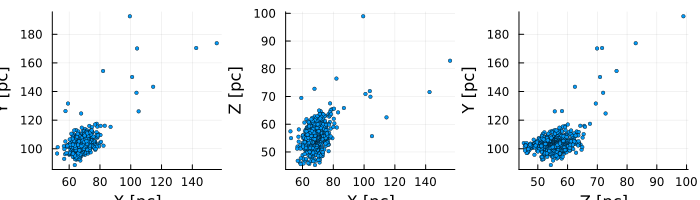

In [52]:
ra = df.ra[cond] .* pi./ 180
dec = df.dec[cond] .* pi./ 180
distance = 1000 ./ df.parallax[cond]

x = distance .* cos.(ra) .* cos.(dec)
y = distance .* sin.(ra) .* cos.(dec)
z = distance .* sin.(dec)

scat1 = scatter(x, y, ms=2, legend=false, xlabel="X [pc]",ylabel="Y [pc]")
scat2 = scatter(x, z, ms=2, legend=false, xlabel="X [pc]",ylabel="Z [pc]")
scat3 = scatter(z, y, ms=2, legend=false, xlabel="Z [pc]",ylabel="Y [pc]")


plot(scat1, scat2, scat3, layout=(1, 3), legend=false)
plot!(size=(700,200))